In [ ]:
# 박조은 강사님의 edwith 부스트코스의 데이터분석 강의를 보고 필사한 것이며
# 알게 된 점이나 느낀 점등을 옆에 주석으로 달아놓은 자료 입니다. 

In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#시각화를 위한 폰트설정

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

**1. K beauty는 성장하고 있을까를 주제로 데이터분석 해보기**

In [2]:
df=pd.read_csv('C:/Users/inha/Desktop/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액.csv',
               encoding='cp949')
df.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,749612,858240,828752,893026,917330,964762,1244311,1338103,1517805,1860640
1,합계,합계,면세점,-,-,-,-,-,-,-,...,610630,677884,665613,725319,761836,766783,1070693,1157158,1336372,1645003
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,138982,180356,163139,167707,155494,197979,173618,180945,181433,215637
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,2018,2158,2042,1485,1554,1791,1656,1530,1438,1571
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,5,1,2,6,1,0,2,0,1,70


In [3]:
df.shape #feature와 행 확인

(450, 27)

In [4]:
df.info()  #결측지 없고, 데이터타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   국가(대륙)별      450 non-null    object
 1   상품군별         450 non-null    object
 2   판매유형별        450 non-null    object
 3   2014 1/4     450 non-null    object
 4   2014 2/4     450 non-null    object
 5   2014 3/4     450 non-null    object
 6   2014 4/4     450 non-null    object
 7   2015 1/4     450 non-null    object
 8   2015 2/4     450 non-null    object
 9   2015 3/4     450 non-null    object
 10  2015 4/4     450 non-null    object
 11  2016 1/4     450 non-null    object
 12  2016 2/4     450 non-null    object
 13  2016 3/4     450 non-null    object
 14  2016 4/4     450 non-null    object
 15  2017 1/4     450 non-null    int64 
 16  2017 2/4     450 non-null    int64 
 17  2017 3/4     450 non-null    int64 
 18  2017 4/4     450 non-null    int64 
 19  2018 1/4     450 non-null    

In [5]:
df.describe()  #max값이 커서 평균이 상승했다와 같은 정보파악

,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,13662.293333,10214.240000,13326.435556,15257.600000,14733.368889,15876.017778,16308.088889,17151.324444,2.212108e+04,2.378850e+04,2.698320e+04,3.307804e+04
std,80120.295137,57963.340672,77744.405607,87096.800427,83979.145435,91911.589913,96284.836908,100839.472107,1.381729e+05,1.480589e+05,1.713174e+05,2.140193e+05
min,0.000000,0.000000,-10003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.250000,0.000000,0.250000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,151.000000,117.000000,145.000000,158.000000,172.000000,160.500000,164.000000,158.000000,1.550000e+02,1.745000e+02,1.165000e+02,1.780000e+02
75%,1379.500000,1077.750000,1576.000000,1511.250000,1364.750000,1419.000000,1435.000000,1511.250000,1.524000e+03,1.528250e+03,1.437750e+03,1.697500e+03
max,768504.000000,574551.000000,749612.000000,858240.000000,828752.000000,893026.000000,917330.000000,964762.000000,1.244311e+06,1.338103e+06,1.517805e+06,1.860640e+06


In [6]:
df['국가(대륙)별'].value_counts()

EU            45
기타            45
합계            45
일본            45
중동            45
아세안(ASEAN)    45
대양주           45
중남미           45
중국            45
미국            45
Name: 국가(대륙)별, dtype: int64

In [7]:
#만약 미국만 보고싶다면??

df[df['국가(대륙)별']=='미국']

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,41204,39108,36536,47981,39995,43443,53852,51478
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2071,2657,2951,1818,1483
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,36020,35505,34219,45910,37338,40492,52034,49995
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,696,567,773,854,621,646,934,802
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,696,567,773,854,621,646,934,802
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1778
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1729
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


**2. 분석과 시각화를 위한 tidy data만들기**

In [8]:
df=df.melt(id_vars=['국가(대륙)별','상품군별','판매유형별'],var_name='기간',value_name='백만원')

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [9]:
df.info()  #object는 string데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


In [10]:
df['연도']= df['기간'].map(lambda x:int(x.split()[0]))

#map은 함수를 한번에 적용하고 위 함수는 연도만 빼오는 거임 datatype int로 변경하고
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [11]:
df['분기']=df['기간'].map(lambda x:int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


In [12]:
df['백만원'].replace('-',np.nan)   #replace함수를 통해 -라는 결측치를 np.nan으로 변경

0        148272
1           NaN
2           NaN
3          4915
4           NaN
          ...  
10795         0
10796       531
10797      1094
10798         1
10799      1093
Name: 백만원, Length: 10800, dtype: object

In [13]:
df['백만원']=df['백만원'].replace('-',np.nan).astype(float)  #type변경은 astype
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


**3. 필요없는 데이터 제거하기**

In [14]:
df=df[(df['국가(대륙)별']!='합계') & (df['상품군별']!='합계')].copy()

df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4 p),0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4 p),531.0,2019,4
10797,기타,기 타,계,2019 4/4 p),1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4 p),1.0,2019,4


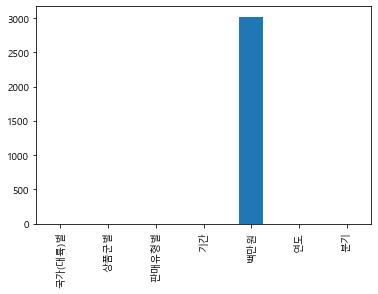

In [15]:
df.isnull().sum().plot.bar()

In [16]:
df_total=df[df['판매유형별']=='계'].copy()
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


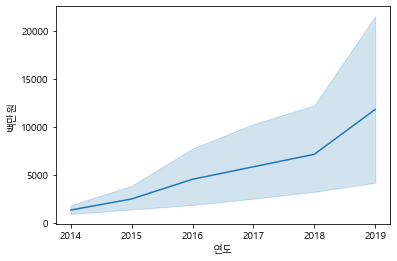

In [17]:
sns.lineplot(data=df_total,x='연도',y='백만원')

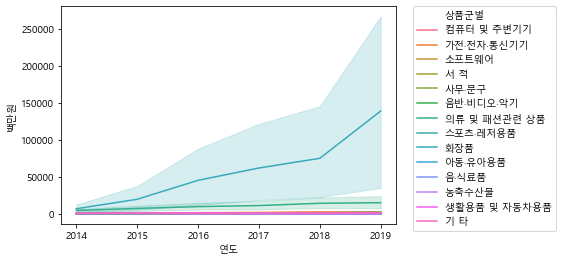

In [18]:
#hue 기능이 엄청 유용하네...
#relplot 그래프도 유용한듯...


sns.lineplot(data=df_total,x='연도',y='백만원',hue='상품군별')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

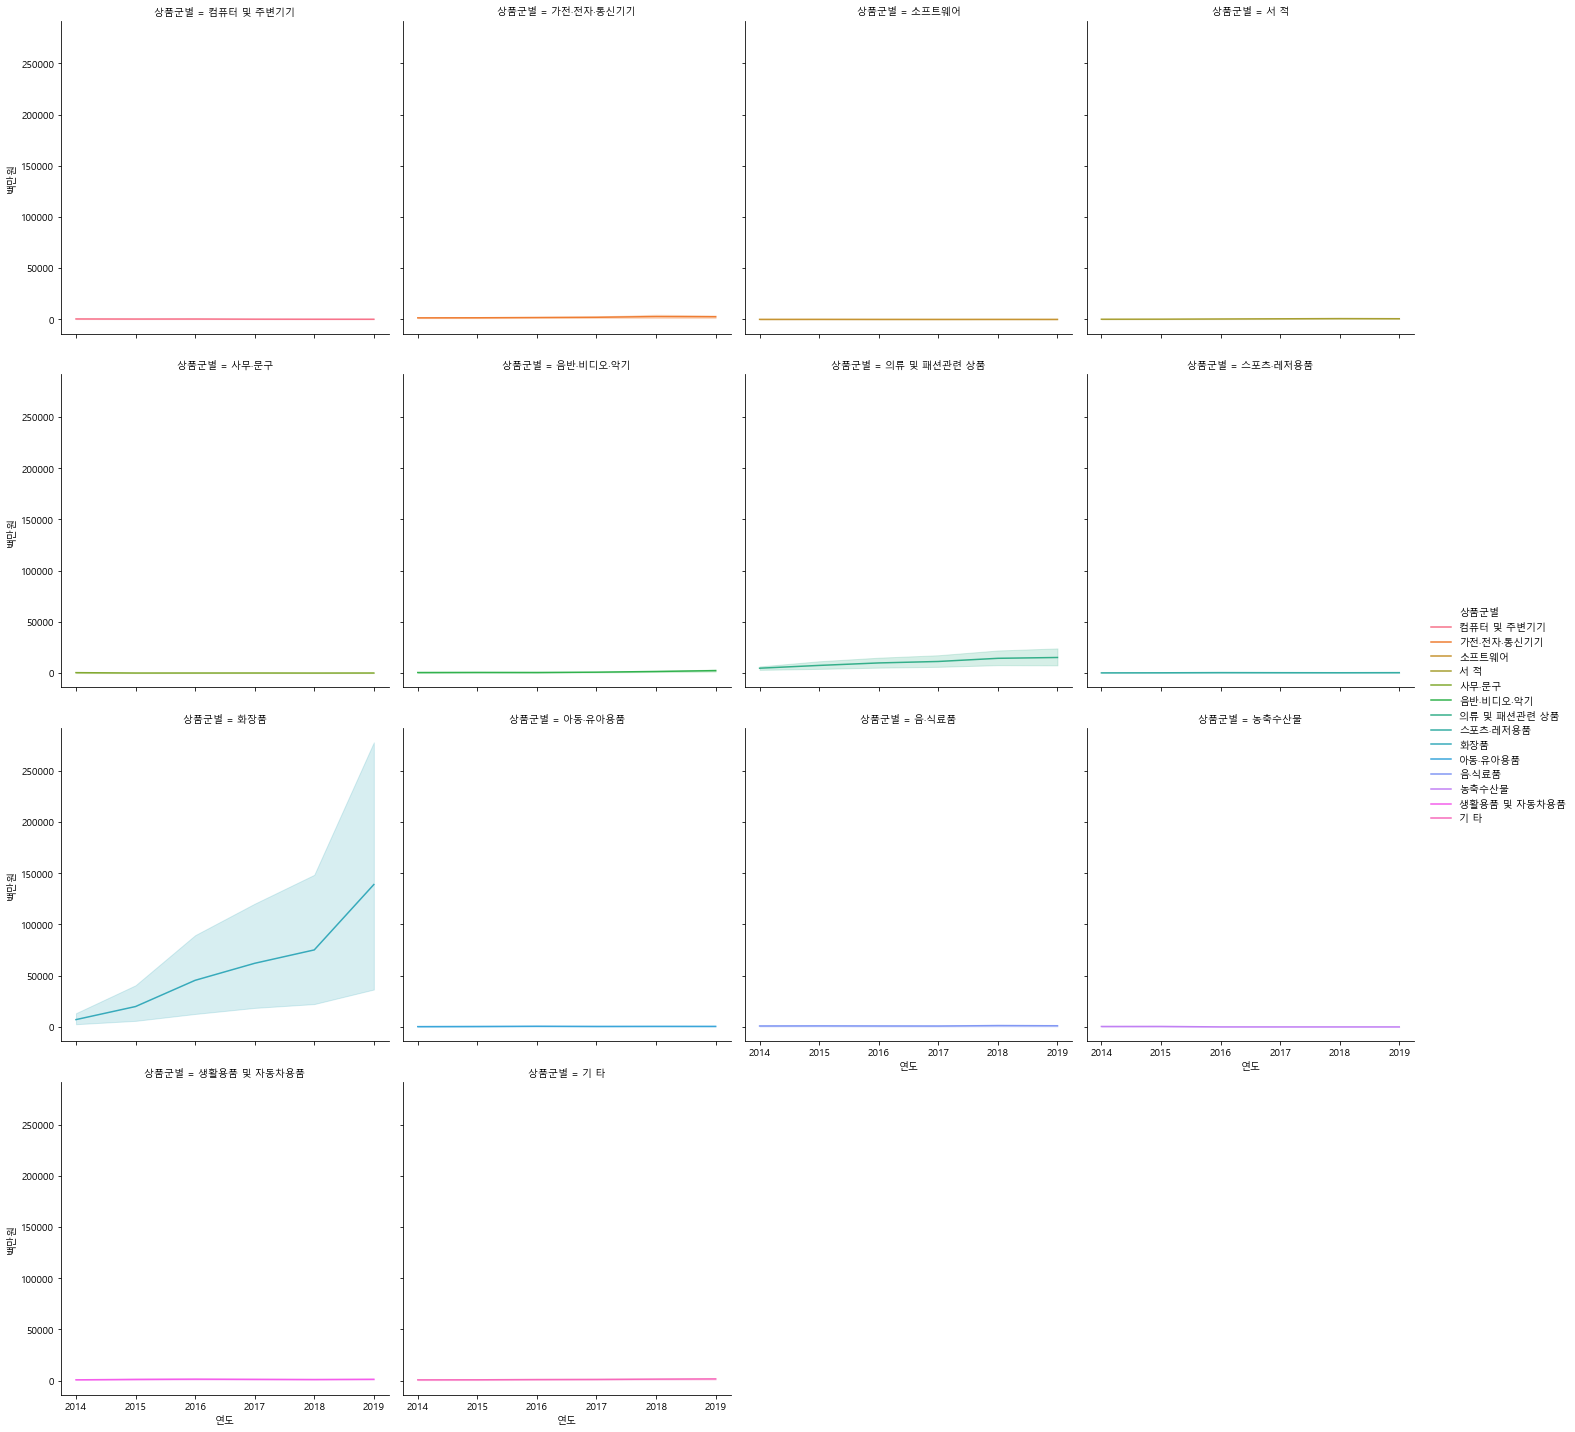

In [29]:
sns.relplot(data=df_total,x='연도',y='백만원',hue='상품군별',kind='line',col='상품군별',col_wrap=4)

#화장품 때문에 다른 값들이 잘 안보인다 따라서 화장품만 삭제

In [47]:
#그래프 잘 안보이면 빼고 그리는 부분 이부분 아주 유용함...

df_sub=df_total[df_total['상품군별'] != '화장품'].copy()
df_sub             

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4 p),192.0,2019,4
10788,기타,음·식료품,계,2019 4/4 p),315.0,2019,4
10791,기타,농축수산물,계,2019 4/4 p),2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4 p),531.0,2019,4


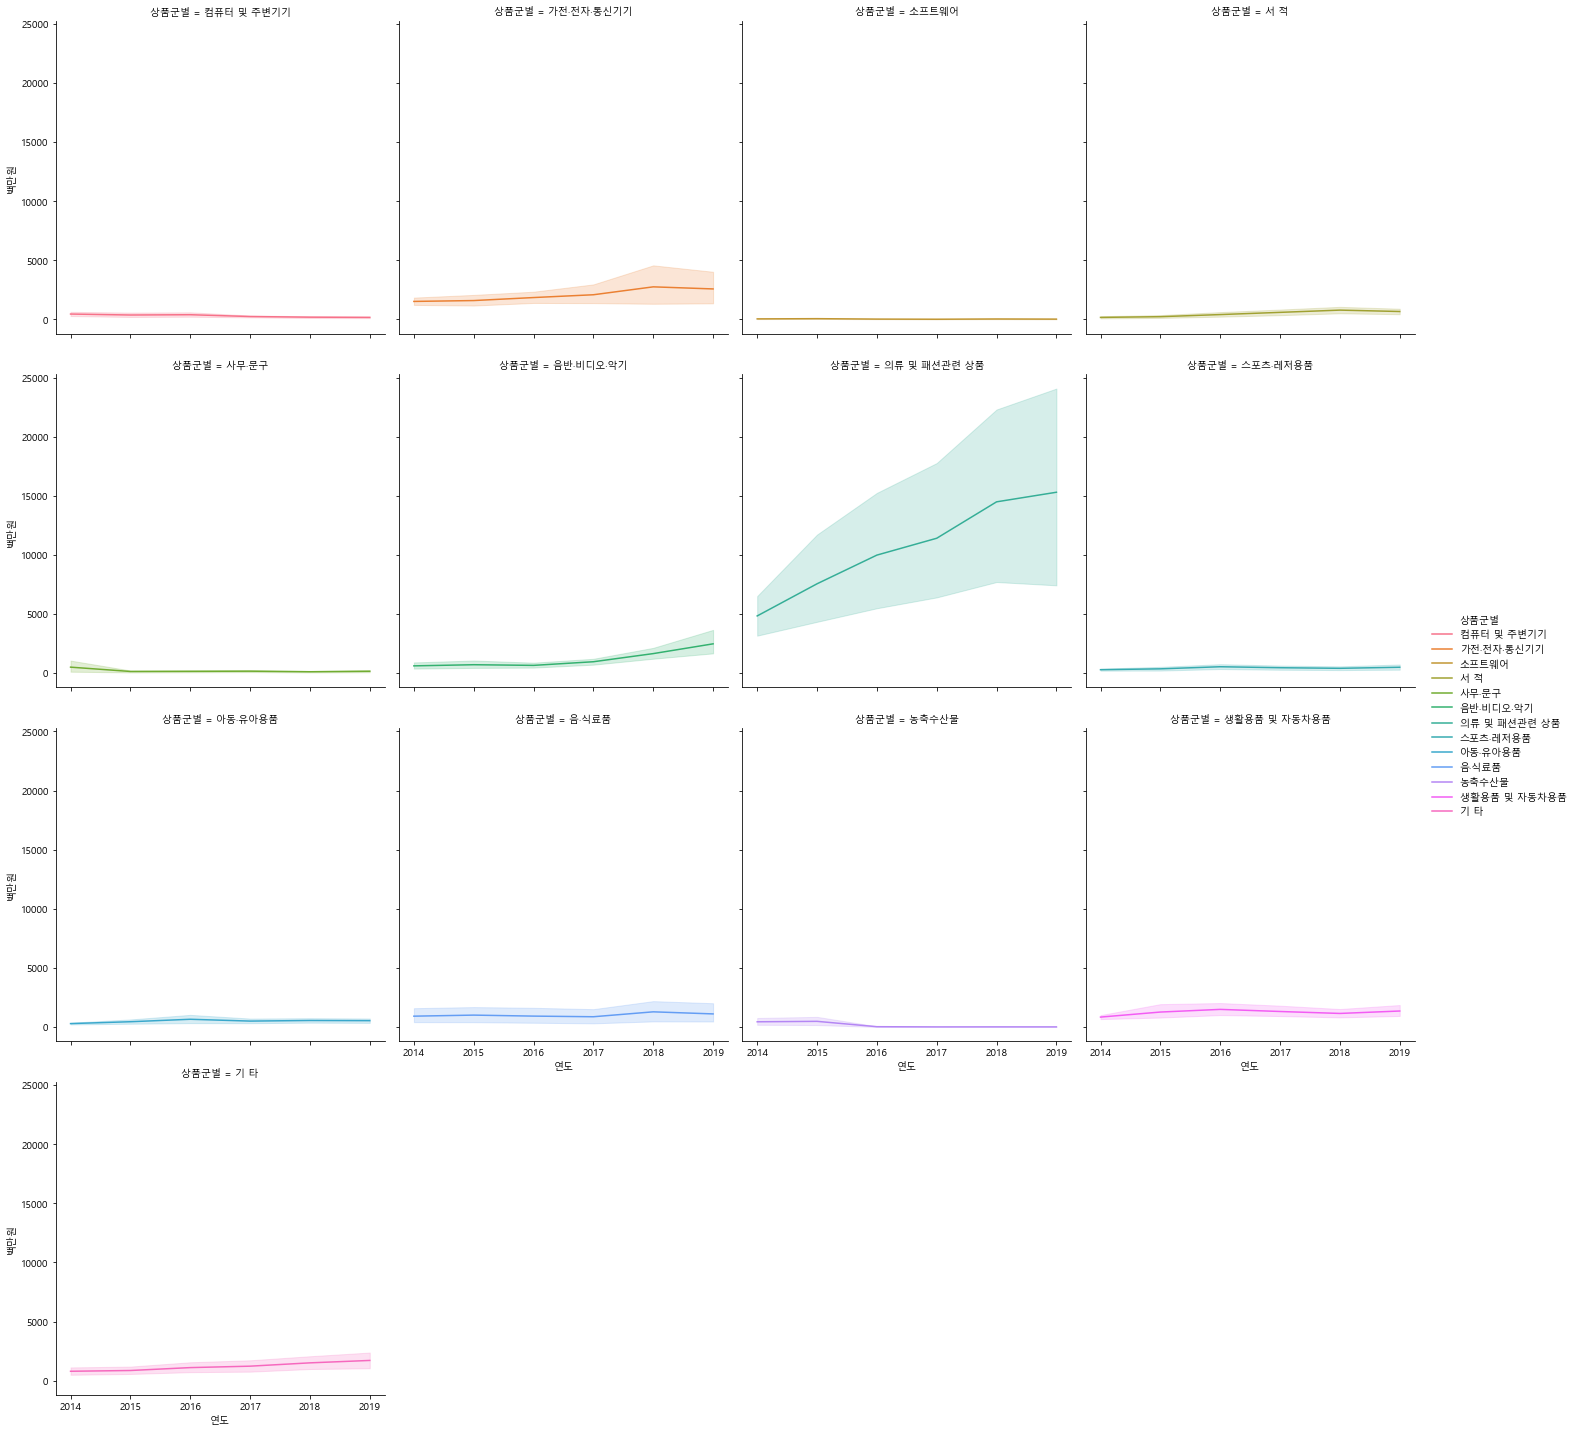

In [48]:
sns.relplot(data=df_sub,x='연도',y='백만원',hue='상품군별',col='상품군별',col_wrap=4,kind='line')

In [49]:
df_cosmetic=df_total[df_total['상품군별']== '화장품'].copy() 
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,EU,화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
10602,EU,화장품,계,2019 4/4 p),3904.0,2019,4
10647,중동,화장품,계,2019 4/4 p),1129.0,2019,4
10692,중남미,화장품,계,2019 4/4 p),636.0,2019,4
10737,대양주,화장품,계,2019 4/4 p),1084.0,2019,4


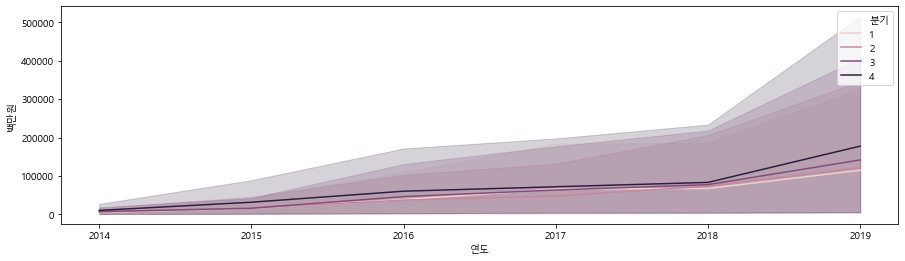

In [50]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic,x='연도',y='백만원',hue='분기')

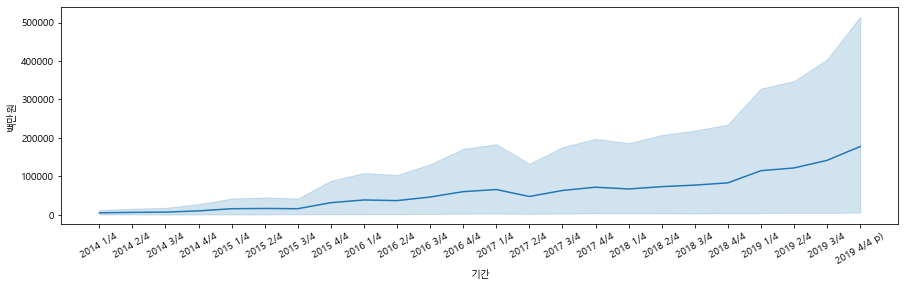

In [51]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic,x='기간',y='백만원') 


# 데이터 집계하기

In [55]:
result= df_cosmetic.pivot_table(index='국가(대륙)별',columns='연도',values='백만원',aggfunc='sum')

result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
EU,3428.0,4858.0,8960.0,9539.0,11800.0,12825.0
기타,23137.0,34700.0,58579.0,102529.0,76230.0,92275.0
대양주,2776.0,2634.0,4248.0,4619.0,3916.0,3363.0
미국,15447.0,32951.0,45684.0,69328.0,50515.0,48117.0
아세안(ASEAN),1705.0,5065.0,10773.0,39136.0,90027.0,116926.0
일본,3400.0,6600.0,11345.0,16998.0,18702.0,43472.0
중국,203499.0,625774.0,1493237.0,1989650.0,2449946.0,4680568.0
중남미,1792.0,1592.0,2616.0,1850.0,2084.0,2419.0
중동,1794.0,2312.0,2152.0,2333.0,2866.0,3386.0


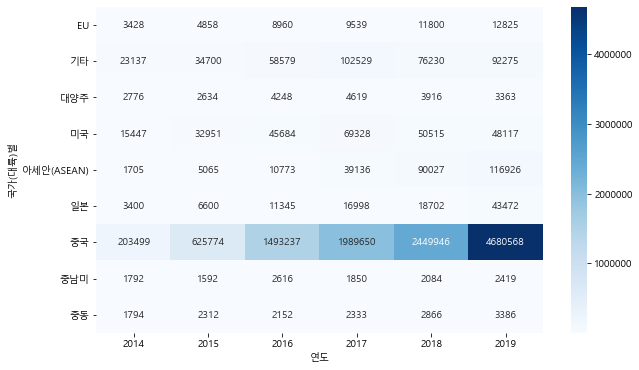

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(result,cmap='Blues',annot=True,fmt='.0f')  #중국이 오지게 샀네.. cmap은 heatmap색깔  annot은 안에 숫자값 같이 표시

# 전체 상품군별로 온라인 쇼핑 해외직접 판매액증가했을지 보기

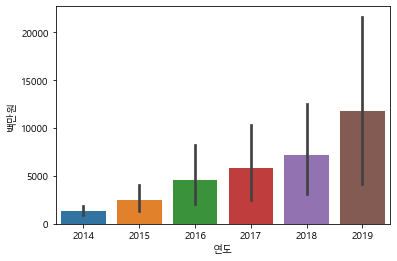

In [62]:
df_total

sns.barplot(data=df_total,x='연도',y='백만원')

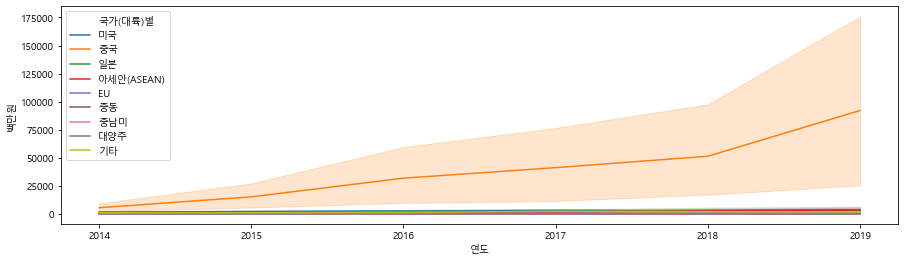

In [65]:
plt.figure(figsize=(15,4))

sns.lineplot(data=df_total,x='연도',y='백만원',hue='국가(대륙)별')